# RBRSolo processing

Run `rbrmoored` on a little test file. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from pathlib import Path
import pyrsktools
import os

import rbrmoored as rbr

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
rbr.__version__

'0.1.0'

In [3]:
pyrsktools.__version__

'1.1.1'

Path to .rsk file.

In [4]:
rbrdir = Path('../rbrmoored/tests/data/')

Clock calibration. At this time noted in UTC, the thermistor was dipped in warm water to provide a reference time.

In [5]:
cal = np.datetime64('2020-10-12 16:52:00')

Processing parameters

In [6]:
data_out = Path('.')

In [7]:
solofile = rbrdir.joinpath("076611_20201012_1352.rsk")

Read the .rsk file into `xarray.DataArray` without any further processing.

In [8]:
solo = rbr.solo.read(solofile)

reading SN 76611


In [9]:
solo.time

<xarray.DataArray 'time' (time: 201)>
array(['2020-10-12T16:46:03.000000000', '2020-10-12T16:46:05.000000000',
       '2020-10-12T16:46:07.000000000', ..., '2020-10-12T16:52:39.000000000',
       '2020-10-12T16:52:41.000000000', '2020-10-12T16:52:43.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-10-12T16:46:03 ... 2020-10-12T16:52:43

Process the .rsk file including applying time offset and plotting the time series and the clock calibration/verification.

reading raw rsk file
reading SN 76611
applying time offset of -13ms


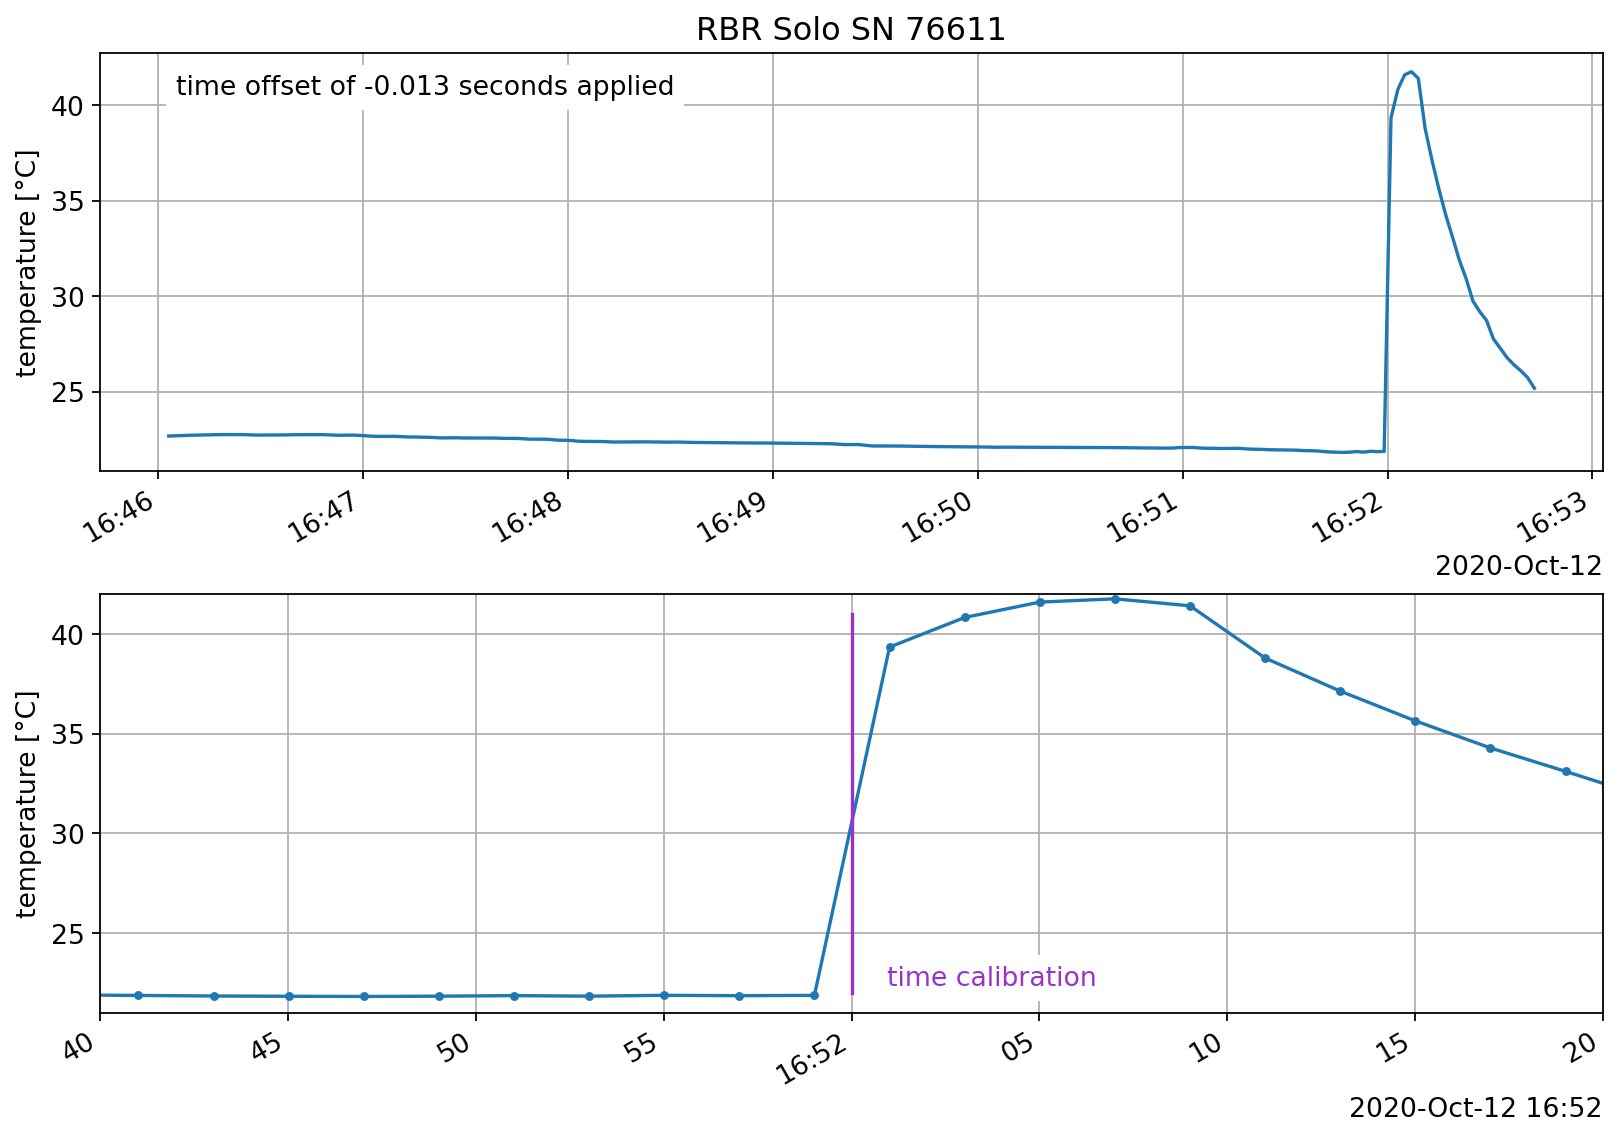

In [10]:
solo = rbr.solo.proc(solofile, data_out=None, figure_out=None, cal_time=cal, show_plot=True)

In [11]:
solo.attrs

{'units': '°C',
 'long_name': 'temperature',
 'SN': 76611,
 'model': 'RBRsolo',
 'firmware version': '1.11',
 'pyrsktools version': '1.1.1',
 'rbrmoored version': '0.1.0',
 'file': '076611_20201012_1352.rsk',
 'time drift in ms': -13,
 'download time': '2020-10-12T16:52:49.194',
 'sample size': 201,
 'sampling period in s': 2.0,
 'time offset applied': 1}